In [3]:
# dataset
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
X = data[:,:3]
y = data[:,3:]

# split into training and testing data
N_training = 160
N_testing = 40

X_training = X[:N_training]
X_testing  = X[N_training:]

y_training = y[:N_training]
y_testing  = y[N_training:]

# khi các feature có các range giá trị khác nhau
# chúng ta cần normalize các feature để đưa về cùng range
maxi = np.max(X_training)
mini = np.min(X_training)
X_training = (X_training-mini) / (maxi-mini)

# tạo vector feature [b, w]
X_training_b = np.c_[np.ones((N_training, 1)), X_training]

Init theta: 
 [[-0.09540991]
 [ 1.74015673]
 [-0.6323054 ]
 [-2.41900335]]
Final theta:
 [[ 6.32133367]
 [16.40161086]
 [ 5.71186345]
 [ 1.84281891]]


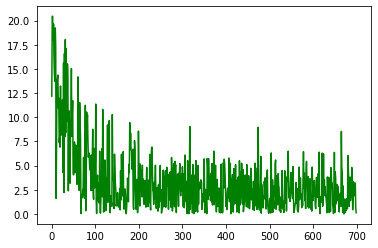

In [4]:
# training
epoch_max = 50
eta = 0.01

# khởi tạo giá trị tham số
theta = np.random.randn(4, 1)
print('Init theta: \n', theta)

thetas_path = [theta]
losses = []

for epoch in range(epoch_max):
    for i in range(N_training):
        # lấy ngẫu nhiên 1 sample
        random_index = np.random.randint(N_training)
        xi = X_training_b[random_index:random_index+1]
        yi = y_training[random_index:random_index+1]

        # tính output 
        oi = xi.dot(theta)

        # tính loss li
        li = abs(oi - yi)

        # tính gradient cho loss
        g_li = (oi - yi)

        # tính gradient 
        gradients = xi.T.dot(g_li)

        # update giá trị theta
        theta = theta - eta*gradients

        # logging
        thetas_path.append(theta)            
        losses.append(li[0][0])    


# in loss cho 700 sample đầu
print('Final theta:\n', thetas_path[-1])
x_axis = list(range(700))
plt.plot(x_axis, losses[:700], color="g")
plt.show()

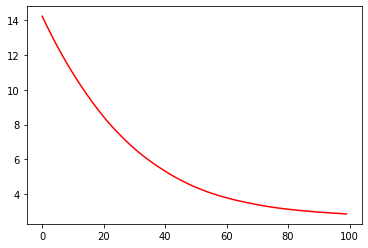

In [6]:
n_iterations = 1000
learning_rate = 0.01

# khởi tạo giá trị tham số
theta = np.random.randn(4, 1)
thetas_path = [theta]
losses = []

for i in range(n_iterations):
    # tính output
    output = X_training_b.dot(theta)

    # tính loss
    loss = np.abs(output - y_training)   

    # tính đạo hàm cho loss
    loss_grd = 2*(output - y_training)/N_training

    # tính đạo hàm cho các tham số
    gradients = X_training_b.T.dot(loss_grd)

    # cập nhật tham số
    theta = theta - learning_rate*gradients
    thetas_path.append(theta)

    mean_loss = np.sum(loss)/N_training
    losses.append(mean_loss)

# in loss cho 100 sample đầu
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()